In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import datetime as dt
from scipy.stats import mstats

# 1. Dataset Exploration

In [4]:
df = pd.read_csv(r'C:\Users\20766\Desktop\Business Project\CarPriceProject\train.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
print(df.isnull().sum())

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


In [7]:
# Remove Dupicates
df.duplicated().sum()

313

In [8]:
df.drop_duplicates(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [15]:
df['Doors'].value_counts()

Doors
04-May    18032
02-Mar      768
>5          124
Name: count, dtype: int64

In [16]:
def preprocess_data(df):
    # 1. Convert the 'Levy' column
    df['Levy'] = df['Levy'].replace('-', np.nan)
    df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
    df['Levy'] = df['Levy'].fillna(df['Levy'].median())

    # 2. Convert the 'Engine volume' column
    df['Engine volume'] = df['Engine volume'].astype(str)
    df['Engine volume'] = df['Engine volume'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # 3. Convert the 'Mileage' column
    df['Mileage'] = df['Mileage'].astype(str)
    df['Mileage'] = df['Mileage'].str.replace(' km', '', regex=True).astype(int)

    # 4. Convert the 'Doors' column
    df['Doors'] = df['Doors'].replace({'04-May': '4', '02-Mar': '2', '>5': '5'})
    df['Doors'] = df['Doors'].astype(int)

    # 5. Convert all string columns to lowercase
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.lower()

    # 6. Calculate car age
    current_year = dt.datetime.now().year
    df['Prod. year'] = current_year - df['Prod. year']

    # 7. Create dummy variables (One-Hot Encoding)
    dummies = pd.get_dummies(df[['Drive wheels', 'Gear box type', 'Fuel type']], 
                              prefix=['Drive', 'Gear_box', 'Fuel'])
    df = pd.concat([df, dummies], axis=1)
    df.drop(['Drive wheels', 'Gear box type', 'Fuel type'], axis=1, inplace=True)

    # 8. Label Encoding for remaining object columns
    label_encoder = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col])

    return df

df = preprocess_data(df)
# 9. Check the information of the cleaned DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   18924 non-null  int64  
 1   Price                18924 non-null  int64  
 2   Levy                 18924 non-null  float64
 3   Manufacturer         18924 non-null  int32  
 4   Model                18924 non-null  int32  
 5   Prod. year           18924 non-null  int64  
 6   Category             18924 non-null  int32  
 7   Leather interior     18924 non-null  int32  
 8   Engine volume        18924 non-null  float64
 9   Mileage              18924 non-null  int32  
 10  Cylinders            18924 non-null  float64
 11  Doors                18924 non-null  int32  
 12  Wheel                18924 non-null  int32  
 13  Color                18924 non-null  int32  
 14  Airbags              18924 non-null  int64  
 15  Drive_4x4            18924 non-null  bool

In [17]:
print(df.describe())

                 ID         Price          Levy  Manufacturer         Model  \
count  1.892400e+04  1.892400e+04  18924.000000  18924.000000  18924.000000   
mean   4.557538e+07  1.858744e+04    868.498890     33.087349    821.805379   
std    9.375468e+05  1.921356e+05    391.400489     17.787356    393.363886   
min    2.074688e+07  1.000000e+00     87.000000      0.000000      0.000000   
25%    4.569501e+07  5.331000e+03    730.000000     21.000000    506.000000   
50%    4.577191e+07  1.317200e+04    781.000000     32.000000    795.000000   
75%    4.580174e+07  2.206300e+04    917.000000     54.000000   1183.000000   
max    4.581665e+07  2.630750e+07  11714.000000     64.000000   1510.000000   

         Prod. year      Category  Leather interior  Engine volume  \
count  18924.000000  18924.000000      18924.000000   18924.000000   
mean      14.085764      6.266804          0.725587       2.306251   
std        5.665749      2.791944          0.446230       0.877591   
min     

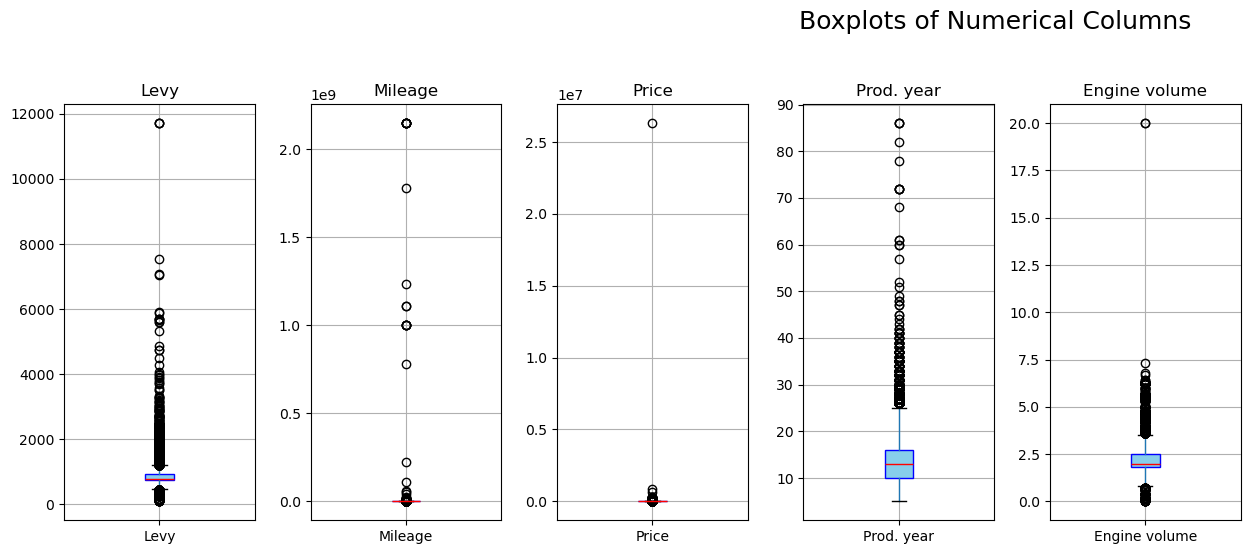

               Levy       Mileage         Price    Prod. year  Engine volume
count  18924.000000  1.892400e+04  1.892400e+04  18924.000000   18924.000000
mean     868.498890  1.555373e+06  1.858744e+04     14.085764       2.306251
std      391.400489  4.880221e+07  1.921356e+05      5.665749       0.877591
min       87.000000  0.000000e+00  1.000000e+00      5.000000       0.000000
25%      730.000000  7.019575e+04  5.331000e+03     10.000000       1.800000
50%      781.000000  1.264000e+05  1.317200e+04     13.000000       2.000000
75%      917.000000  1.891198e+05  2.206300e+04     16.000000       2.500000
max    11714.000000  2.147484e+09  2.630750e+07     86.000000      20.000000


In [18]:
# Boxplot _ check for outliers
numerical_columns = ['Levy', 'Mileage', 'Price', 'Prod. year', 'Engine volume']
plt.figure(figsize=(20, 10))
plt.suptitle('Boxplots of Numerical Columns', fontsize=18)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 8, i)
    df.boxplot(column=col, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'),
                 medianprops=dict(color='red'))
    plt.title(col, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
print(df[numerical_columns].describe())

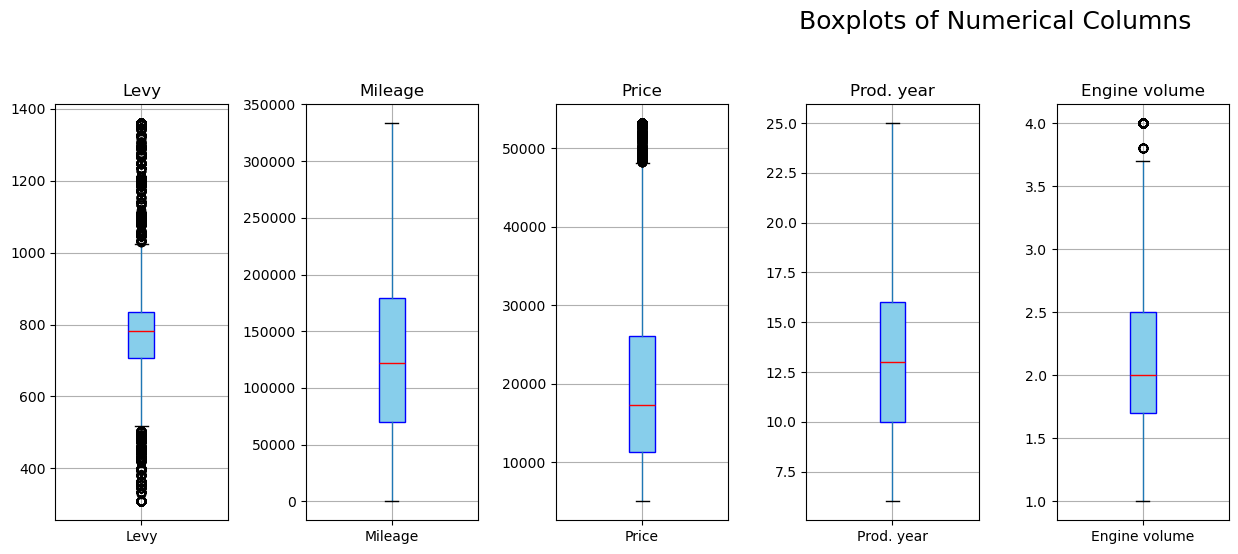

               Levy        Mileage         Price    Prod. year  Engine volume
count  13777.000000   13777.000000  13777.000000  13777.000000   13777.000000
mean     801.525005  132091.552152  20762.277201     13.809755       2.186027
std      211.057454   83173.901924  12678.184425      4.777196       0.682387
min      308.000000       0.000000   5018.000000      6.000000       1.000000
25%      707.000000   70220.000000  11290.000000     10.000000       1.700000
50%      781.000000  121940.000000  17249.000000     13.000000       2.000000
75%      836.000000  179381.000000  26030.000000     16.000000       2.500000
max     1360.000000  333444.000000  53154.000000     25.000000       4.000000


In [19]:
# From above, we can do the following outlier handling
# 1. Engine volume should not be 0
df = df[df['Engine volume'] > 0]
# 2. Remove abnormal price value
Q1 = df['Price'].quantile(0.125)
Q3 = df['Price'].quantile(0.875)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
# 3.  Remove abnormal levy
df['Levy_Percentage'] = (df['Levy'] / df['Price']) * 100
df = df[df['Levy_Percentage'] <= 15]
# 4. Winsorization
for col in numerical_columns[0:5]:
    df.loc[:, col] = mstats.winsorize(df[col], limits=[0.01, 0.04])


plt.figure(figsize=(20, 10))
plt.suptitle('Boxplots of Numerical Columns', fontsize=18)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 8, i)
    df.boxplot(column=col, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'),
                 medianprops=dict(color='red'))
    plt.title(col, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
print(df[numerical_columns].describe())

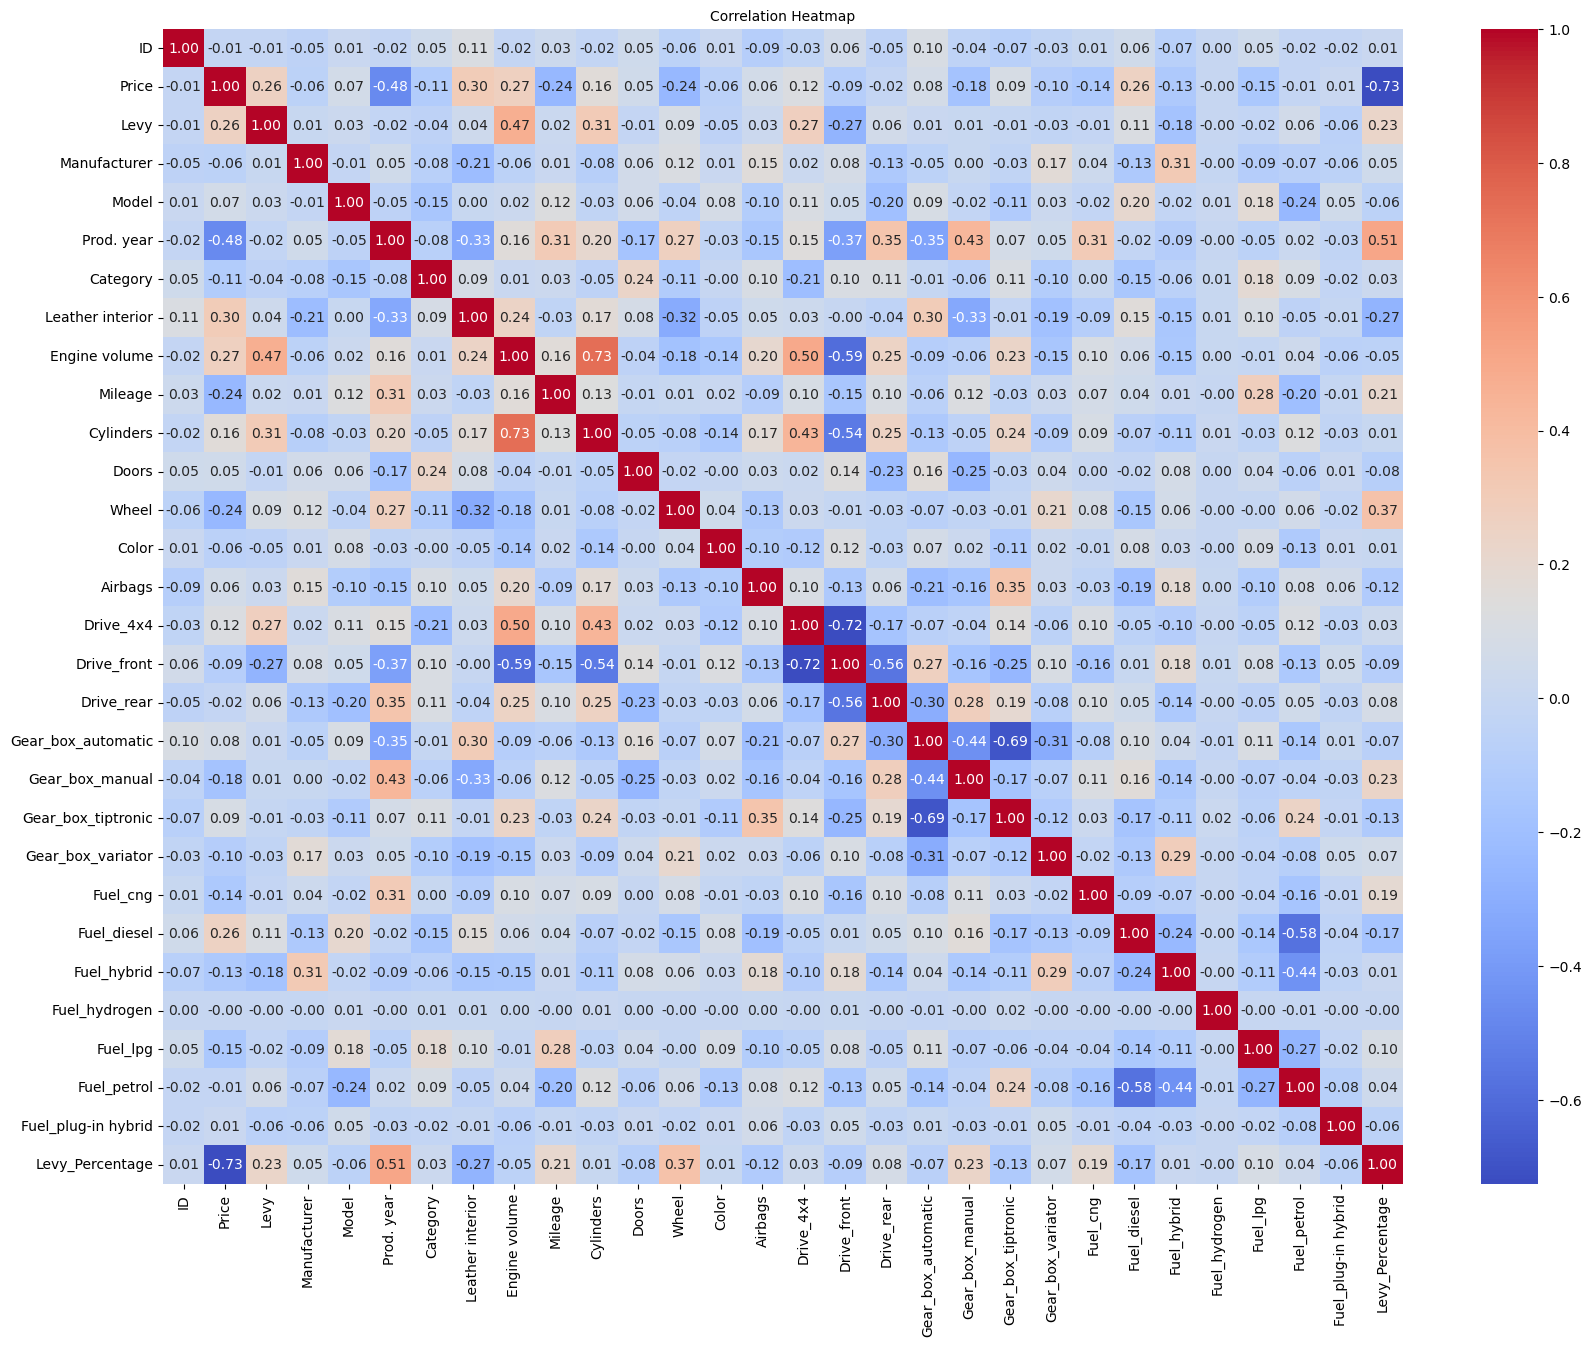

In [23]:
# Correlation Map After Cleaning

corr_columns = df.select_dtypes(include=['number', 'bool'])
correlation_matrix = corr_columns.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=10)
plt.show()

In [35]:
print(df.info())

# 假设 df 是你的 DataFrame
pd.set_option('display.max_columns', None)  # 显示所有列
print(df)


<class 'pandas.core.frame.DataFrame'>
Index: 13777 entries, 0 to 19234
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   13777 non-null  int64  
 1   Price                13777 non-null  int64  
 2   Levy                 13777 non-null  float64
 3   Manufacturer         13777 non-null  int32  
 4   Model                13777 non-null  int32  
 5   Prod. year           13777 non-null  int64  
 6   Category             13777 non-null  int32  
 7   Leather interior     13777 non-null  int32  
 8   Engine volume        13777 non-null  float64
 9   Mileage              13777 non-null  int32  
 10  Cylinders            13777 non-null  float64
 11  Doors                13777 non-null  int32  
 12  Wheel                13777 non-null  int32  
 13  Color                13777 non-null  int32  
 14  Airbags              13777 non-null  int64  
 15  Drive_4x4            13777 non-null  bool

In [58]:
# Split Data Into Train and Test
X = df.drop(['Price', 'ID', 'Levy_Percentage'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

print(f"Shape of training inputs: {X_train.shape}")
print(f"Shape of testing inputs: {X_test.shape}")

Shape of training inputs: (11021, 27)
Shape of testing inputs: (2756, 27)


# 2. Baseline Model - linear Regression


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [62]:
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

# Evaluation with MAE and MSE
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print(f"Baseline Model - Linear Regression")
print(f"MAE: {mae_baseline:.4f}")
print(f"MSE: {mse_baseline:.4f}")
print(f"R2 Score: {r2_baseline:.4f}")


Baseline Model - Linear Regression
MAE: 6873.0874
MSE: 82407124.1419
R2 Score: 0.4918


# 3. Model Comparison: Random Forest and XGB

In [68]:
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}
initial_results = {}

# Evaluation
print("\n--- Step 1: Initial Model Evaluation ---")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} Model:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print("-" * 30)


--- Step 1: Initial Model Evaluation ---
LinearRegression Model:
MAE: 6873.0874
MSE: 82407124.1419
R2 Score: 0.4918
------------------------------
RandomForest Model:
MAE: 3473.0518
MSE: 31732909.6192
R2 Score: 0.8043
------------------------------
XGBoost Model:
MAE: 3824.8713
MSE: 32443085.4854
R2 Score: 0.7999
------------------------------


# 4. Hyperparameter Tuning and then find the "Best Model"


In [70]:
# Define hyperparameter search space for each model
param_grids = {
    "LinearRegression": {
        'alpha': [0.01, 0.1, 1, 10, 100]  # Using Ridge Regression instead of plain Linear Regression
    },
    "RandomForest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Perform hyperparameter tuning for each model
tuned_results = {}

print("\n--- Step 2: Hyperparameter Tuning ---")
for name, param_grid in param_grids.items():
    print(f"Tuning {name} ...")
    
    if name == "LinearRegression":
        model = Ridge()
    elif name == "RandomForest":
        model = RandomForestRegressor(random_state=42)
    elif name == "XGBoost":
        model = XGBRegressor(random_state=42)

    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"  Best Parameters for {name}: {best_params}")

    # Train the model with the best parameters
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)
    y_pred_best = best_model.predict(X_test)

    # Evaluate the tuned model
    mae_best = mean_absolute_error(y_test, y_pred_best)
    mse_best = mean_squared_error(y_test, y_pred_best)
    r2_best = r2_score(y_test, y_pred_best)

    # Store tuned model results
    tuned_results[name] = {"MAE": mae_best, "MSE": mse_best, "R2": r2_best, "Model": best_model}

    print(f"Tuned {name} Model:")
    print(f"  MAE: {mae_best:.4f}")
    print(f"  MSE: {mse_best:.4f}")
    print(f"  R2 Score: {r2_best:.4f}")
    print("-" * 30)

# Step 3: Select the best model based on R² score
best_model_name = max(tuned_results, key=lambda x: tuned_results[x]["R2"])
best_model = tuned_results[best_model_name]["Model"]
best_r2 = tuned_results[best_model_name]["R2"]

print(f"\n*** Best Model after Hyperparameter Tuning: {best_model_name} with R2 Score: {best_r2:.4f} ***")




--- Step 2: Hyperparameter Tuning ---
Tuning LinearRegression ...
  Best Parameters for LinearRegression: {'alpha': 1}
Tuned LinearRegression Model:
  MAE: 6873.1767
  MSE: 82407793.0071
  R2 Score: 0.4918
------------------------------
Tuning RandomForest ...
  Best Parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Tuned RandomForest Model:
  MAE: 3472.7476
  MSE: 31578247.3429
  R2 Score: 0.8053
------------------------------
Tuning XGBoost ...
  Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Tuned XGBoost Model:
  MAE: 3457.2531
  MSE: 27723403.3765
  R2 Score: 0.8290
------------------------------

*** Best Model after Hyperparameter Tuning: XGBoost with R2 Score: 0.8290 ***


# 5. Model Saving- "The best model"

In [77]:
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump({"model": best_model}, file)

print("Model saved successfully!")


Model saved successfully!
